# Libraries

In [1]:
import os

# go up one directory
os.chdir("..")

import pandas as pd 
import numpy as np
from tqdm import tqdm
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from functions.cosmic_val import *
from functions.graph_tools import *
from functions.data_handling import data_augmentation
from models.muse import *
from functions import cosmic_val
from functions import data_handling as dh
from tqdm import tqdm

# # set seed
np.random.seed(123)
torch.manual_seed(123)

# Data

In [2]:
data_path = "data/catalogues_Ovary_SBS.tsv"
cosmic_path = "data/COSMIC_v3.4_SBS_GRCh37.txt"
output_folder = "data/processed"
output_filename = "Ordered_Ovary_SBS.csv"
ordered_data_path = os.path.join(output_folder, output_filename)

In [3]:
dh.load_preprocess_data(data_path, cosmic_path, sep1 = "\t", sep2 = "\t", output_folder = output_folder, output_filename = output_filename)

Data already exists in  data/processed/Ordered_Ovary_SBS.csv


In [4]:
# load data
data = pd.read_csv(ordered_data_path, index_col = 0)
cosmic = pd.read_csv(cosmic_path, sep = "\t", index_col = 0)

In [5]:
L_ONE = 128
TOLERANCE = 1e-10
CONSTRAINT = 'identity'

In [ ]:
from collections import defaultdict
import pandas as pd
import numpy as np

from functions.data_handling import data_augmentation2

# Dictionary of lists: {k: [iterations]}
results_dict = defaultdict(list)

losses_train = []
signatures = []
iterations = 5
k_range = 5

augmented_data = data_augmentation2(X=data, augmentation=50)
augmented_data = data_augmentation2(X=data, augmentation=50)

for k in tqdm(range(4, k_range)):
    for i in range(iterations):
        
        muse_model = HybridAutoencoder(input_dim=data.shape[0],  # 96
                                        l_1=L_ONE,
                                        latent_dim=k,
                                        weights = 'xavier',)

        # Training MUSE
        muse_error, muse_signatures, muse_exposures, muse_train_loss, muse_val_loss = train_model_for_extraction(
            model=muse_model,
            X_aug_multi_scaled=augmented_data.T,
            X_scaled=data.T,
            signatures=k,
            epochs=2000,
            batch_size=64,
            save_to='muse_test',
            iteration=i,
            patience=15,
            beta = 0.01
        )

        # Normalize signatures
        diagonals_muse = muse_signatures.sum(axis=0)
        muse_exposures = muse_exposures.T @ np.diag(diagonals_muse)
        muse_signatures = muse_signatures @ np.diag(1 / diagonals_muse)

        # Store results
        losses_train.append(muse_train_loss)
        signatures.append(muse_signatures)

        # Store data in structured format
        results_dict[k].append({
            "iteration": i,
            "muse_error": muse_error, # This is the reconstruction error
            "muse_signatures": muse_signatures  # Keep as NumPy array for easier processing
        })

    # Convert dictionary into a DataFrame for better analysis
    df_results = pd.DataFrame([
    {"k": k, "iteration": entry["iteration"], "muse_error": entry["muse_error"], "muse_signatures": entry["muse_signatures"]}
    for k, entries in results_dict.items()
    for entry in entries
    ])


  0%|          | 0/1 [00:00<?, ?it/s]

Early stopping at epoch 41


/home/nicovis/Projects/DeepLearningProject/models/muse.py:370: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Early stopping at epoch 109


/home/nicovis/Projects/DeepLearningProject/models/muse.py:370: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Early stopping at epoch 191


/home/nicovis/Projects/DeepLearningProject/models/muse.py:370: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Early stopping at epoch 152


/home/nicovis/Projects/DeepLearningProject/models/muse.py:370: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))
/home/nicovis

Early stopping at epoch 109


In [19]:
k = find_best_k(df_results, avg_threshold= 0.2, min_threshold=-0.2)

Valid k=4 found with min muse_error=82768.97982140942 and silhouette avg=0.7219271063804626 and min=0.31211188435554504


In [20]:
print(df_results)

   k  iteration     muse_error  \
0  4          0  467486.724195   
1  4          1  246971.884937   
2  4          2   82768.979821   
3  4          3  107561.985905   
4  4          4  236818.816538   

                                     muse_signatures  
0  [[0.0069584507, 0.015054739, 0.019260041, 0.02...  
1  [[0.022861416, 0.0, 0.005896221, 0.0], [0.0160...  
2  [[0.0, 0.002233808, 0.029152093, 0.004167409],...  
3  [[7.682972e-05, 0.0016885648, 0.003391539, 0.0...  
4  [[0.0023517774, 0.0021547603, 0.000476481, 0.0...  


####  Optimize hyperparams & then run bunch of times. Adam lr & beta

In [21]:
from skopt import gp_minimize
from skopt.space import Real
import numpy as np

# Objective function to minimize (muse_error)
def objective(params):
    beta, lr = params
    
    muse_model = HybridAutoencoder(
        input_dim=data.shape[0],  # 96
        l_1=L_ONE,
        latent_dim=k,  # Best k found earlier
        weights='xavier',
        beta=beta  # Varying this in the optimization
    )

    # Train model with candidate beta and learning rate
    muse_error, _, _, _, _ = train_model_for_extraction(
        model=muse_model,
        X_aug_multi_scaled=augmented_data.T,
        X_scaled=data.T,
        signatures=k,
        epochs=2000,
        batch_size=64,
        save_to='muse_test',
        iteration=0,  # Single run per candidate
        patience=15,
        learning_rate=lr  # Optimized learning rate
    )
    
    return muse_error  # Lower is better

# Define search space
search_space = [
    Real(1e-4, 1e-2, name="beta"),  # Log scale for small beta values
    Real(1e-4, 1e-2, name="lr")  # Log scale for learning rate
]

# Run Bayesian Optimization
result = gp_minimize(objective, search_space, n_calls=20, random_state=123)

# Best hyperparameters found
best_beta, best_lr = result.x
print(f"Optimal beta: {best_beta}, Optimal lr: {best_lr}")

ModuleNotFoundError: No module named 'skopt'

In [22]:
print(np.mean(muse_val_loss))

408287.36969610094


In [23]:
# From df_results extract all muse_signatures for a specific k 

k = 4

signatures = df_results[df_results['k'] == k]['muse_signatures'].values

In [24]:
all_signatures = np.hstack(signatures)

In [25]:
print(all_signatures.shape)

(96, 20)


In [26]:
pam = KMedoids(n_clusters = k, metric='cosine').fit(all_signatures.T)
labels = pam.labels_
medoid_indices = pam.medoid_indices_
consensus_signatures = all_signatures[:, medoid_indices]

In [14]:
matched_signatures, mean_similarity = cosmic_val.compute_match(consensus_signatures, cosmic, index = 0)

In [27]:
print(matched_signatures)
print("\nMean similarity of the matched signatures: ", mean_similarity)

   Extracted_0  True_0  Similarity_0
0            0  SBS40a      0.800822
1            1    SBS3      0.864466
2            2   SBS44      0.814021
3            3  SBS10a      0.808931

Mean similarity of the matched signatures:  0.8220599859489464


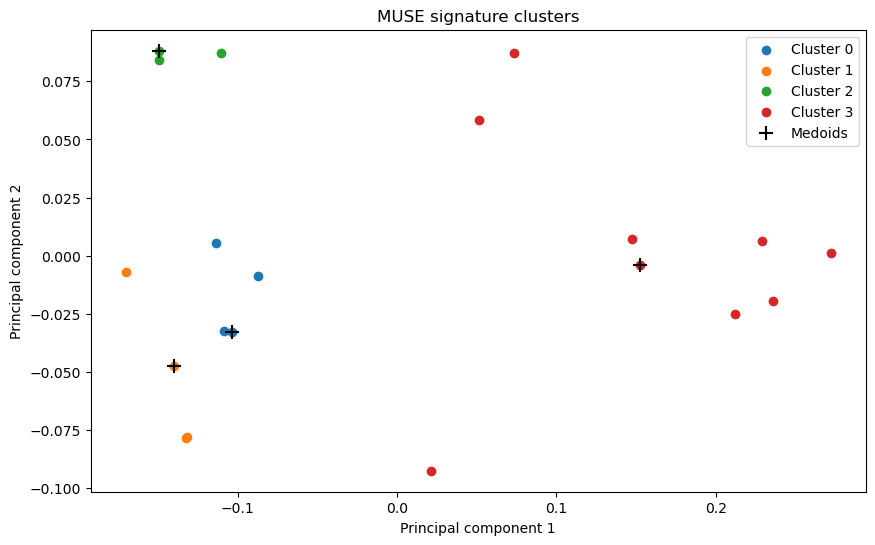

In [28]:
reduced_signatures = PCA(n_components=2).fit_transform(all_signatures.T)
plot_clusters(reduced_signatures, labels, medoid_indices, 4, "MUSE signature clusters")

In [17]:
df_consensus = pd.DataFrame(consensus_signatures, index = data.index)

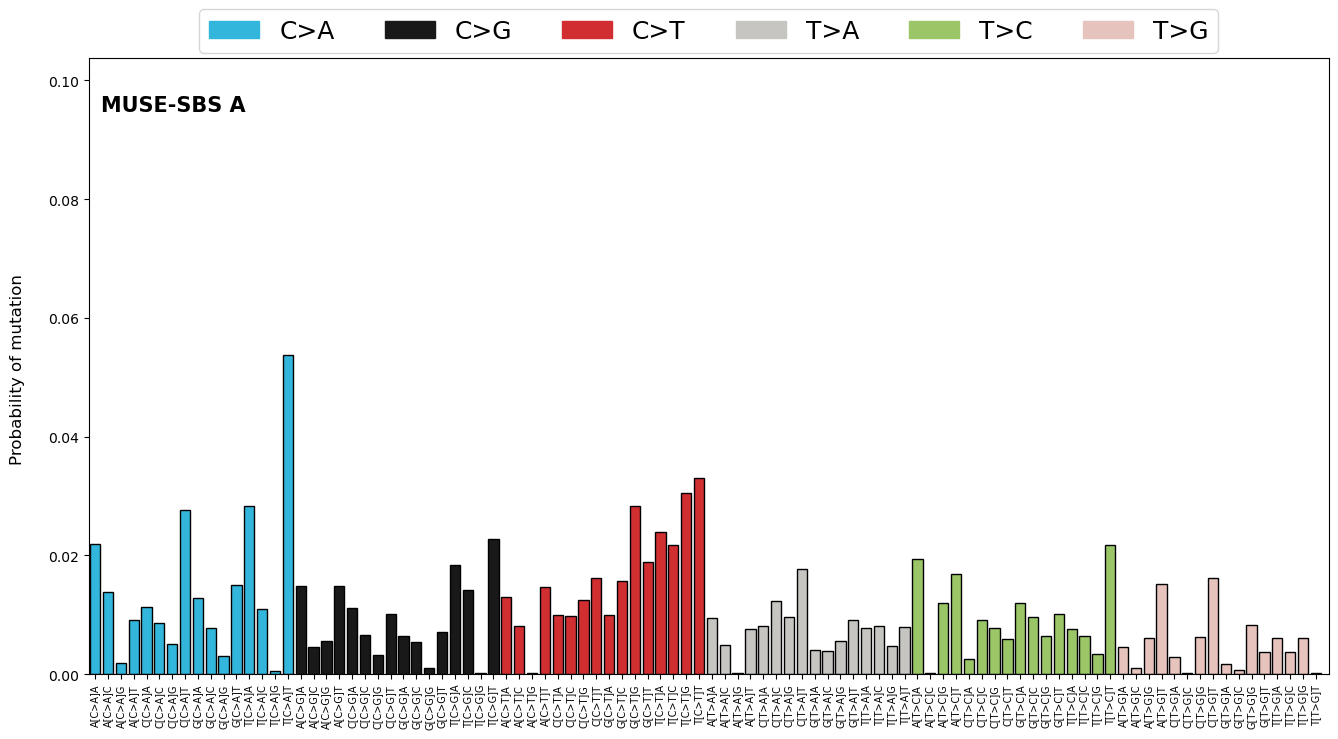

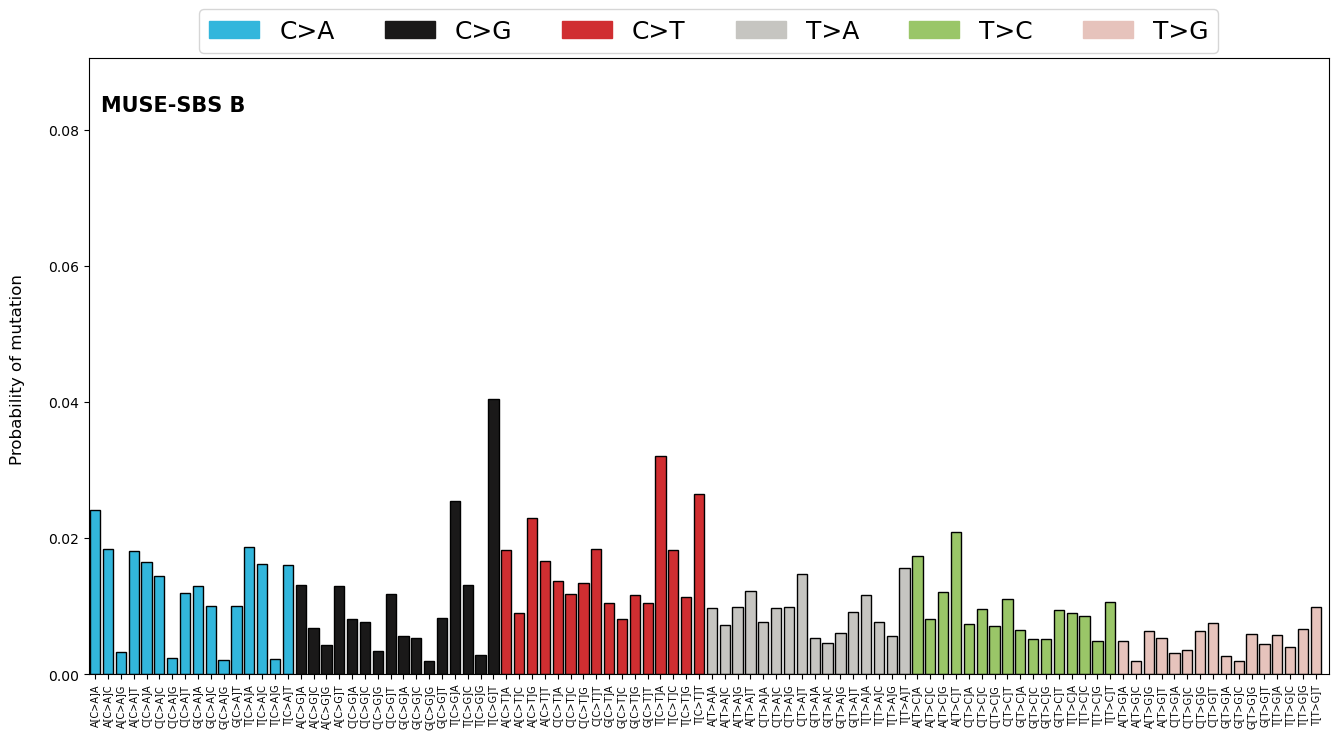

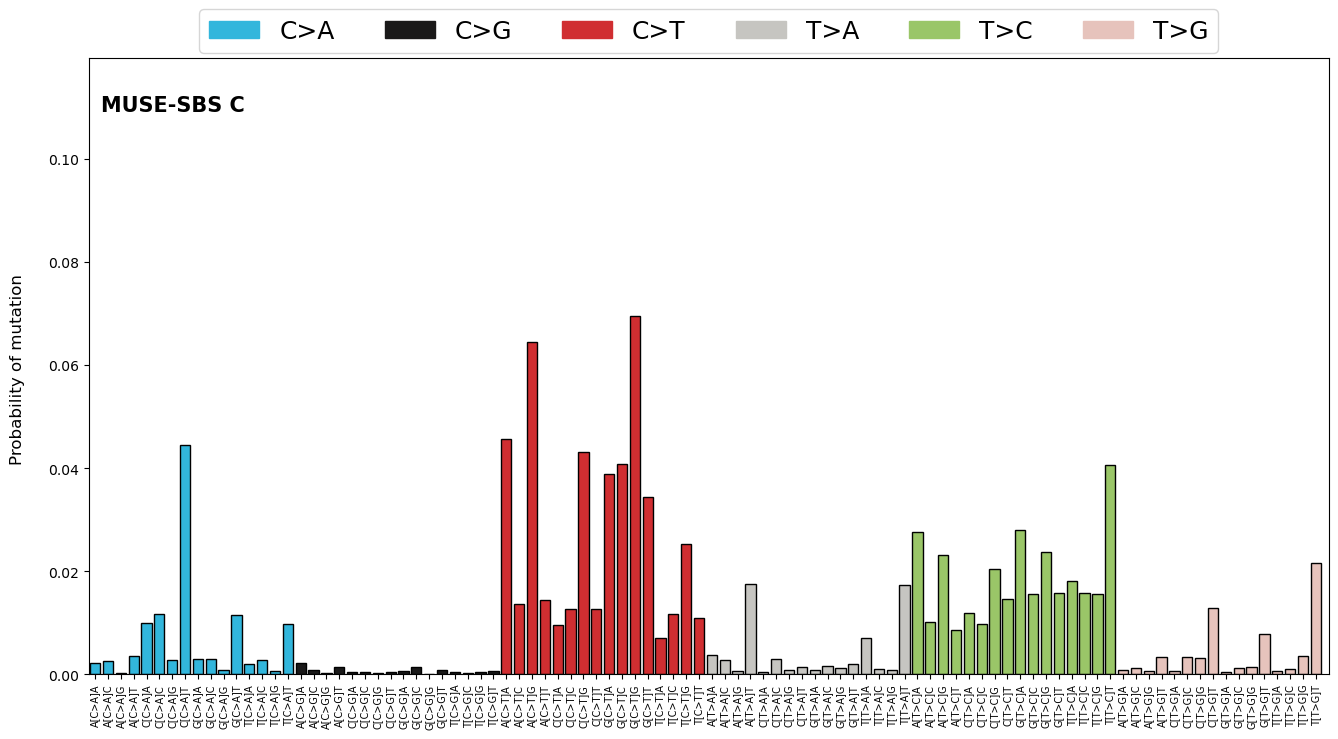

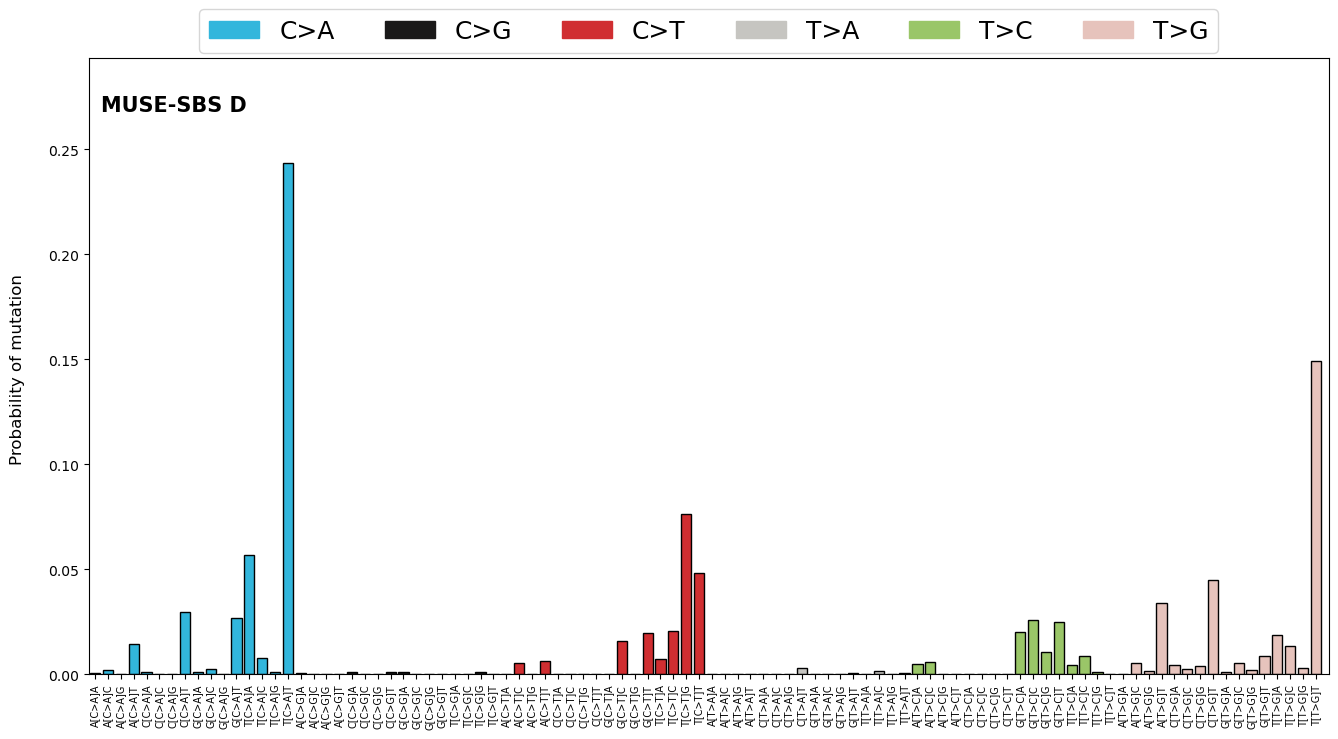

In [18]:
plot_signature(df_consensus, "MUSE")